In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [66]:
#Read the training set from file
train = pd.read_csv('Train_1a.csv')
print("Train ", train.shape)
train.head()

Train  (177, 14)


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Output
0,0.96971,-0.21141,0.019567,-0.104990,0.49927,0.21940,-0.376100,-0.77941,-0.62888,0.11155,-0.063305,0.44952,0.9262,-0.980010
1,1.12910,1.72620,2.253300,1.971600,1.49180,0.83064,-0.301950,-0.35494,-0.15466,0.26529,-0.472900,-2.28370,-1.4468,0.000000
2,0.58824,0.20883,0.267020,0.792490,0.98504,0.85893,-0.035307,-0.72672,-0.65232,0.28964,-0.671170,-0.78219,-3.2950,0.000000
3,0.85289,0.97132,-0.209330,0.814060,0.67885,0.47691,-0.038935,0.22225,-0.67780,-0.59072,0.491200,1.16010,2.4140,0.313210
4,-1.90190,-1.20480,-1.103000,-0.050817,1.11800,0.61725,1.138100,1.83370,3.39220,4.21100,0.561280,0.50147,-1.3378,0.095141


In [67]:
#Read the testing set that we're going to predict
test = pd.read_csv('Test_1a.csv')
print("Test ", test.shape)
test.head()

Test  (15, 13)


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13
0,-1.23150,-1.01690,-0.61475,-0.258790,0.009898,-1.01320,0.24300,0.961700,0.38382,0.038324,0.80103,0.15615,-0.40894
1,-1.25870,-1.23540,-1.63320,-0.685130,-0.496210,0.13314,2.25520,2.192200,0.94823,0.855540,0.29763,1.79430,0.11451
2,-1.41580,-0.69971,-0.63847,-0.791670,0.238280,0.49237,0.37738,0.798280,0.67817,0.429860,0.33379,-3.73650,-3.19940
3,-0.97826,-0.32026,0.20579,0.335350,1.044700,0.53494,0.64235,0.455280,-0.28903,0.422880,0.48706,-1.69930,-0.34848
4,-0.91776,-0.80828,-0.16043,0.051664,0.974000,0.62442,0.94081,0.048564,0.26090,0.083265,0.27589,-2.44840,0.59751


In [68]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [69]:
#Select outliers by using Elliptic Envelope technique in Python. The index with value -1 is identified as an outlier
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(train)
yhat

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1])

In [70]:
#Find the row number that has the detected outliers
res_list = [i for i in range(len(yhat)) if yhat[i] == -1] 
res_list

[84, 114]

In [71]:
#Remove the row in dataset that has the detected outliers
train = train.drop(res_list)
train.shape

(175, 14)

In [72]:
#Get the information of the dataset and explore its structure
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 176
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature1   175 non-null    float64
 1   Feature2   175 non-null    float64
 2   Feature3   175 non-null    float64
 3   Feature4   175 non-null    float64
 4   Feature5   175 non-null    float64
 5   Feature6   175 non-null    float64
 6   Feature7   175 non-null    float64
 7   Feature8   175 non-null    float64
 8   Feature9   175 non-null    float64
 9   Feature10  175 non-null    float64
 10  Feature11  175 non-null    float64
 11  Feature12  175 non-null    float64
 12  Feature13  175 non-null    float64
 13  Output     175 non-null    float64
dtypes: float64(14)
memory usage: 20.5 KB


In [73]:
#Drop any row that has Null value
train = train.dropna()
train.shape

(175, 14)

In [74]:
#Create a list of features in dataset
features = list(train.iloc[:, :-1].columns)
features

['Feature1',
 'Feature2',
 'Feature3',
 'Feature4',
 'Feature5',
 'Feature6',
 'Feature7',
 'Feature8',
 'Feature9',
 'Feature10',
 'Feature11',
 'Feature12',
 'Feature13']

In [75]:
#Standardize the features with the module StandardScaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train[features] = scaler.fit_transform(train[features])
train.head(5)

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Output
0,0.864130,-0.321914,-0.036255,-0.079814,0.514480,0.265996,-0.226149,-0.693136,-0.581329,0.155200,-0.060481,0.159019,0.606518,-0.980010
1,1.021869,1.567994,1.992826,1.798584,1.442493,0.841206,-0.152706,-0.249418,-0.092840,0.314674,-0.426784,-1.038236,-0.349750,0.000000
2,0.486613,0.087980,0.188527,0.732010,0.968674,0.867828,0.111393,-0.638057,-0.605474,0.339932,-0.604098,-0.380517,-1.094535,0.000000
3,0.748521,0.831698,-0.244181,0.751521,0.682387,0.508327,0.107799,0.353946,-0.631721,-0.573259,0.435416,0.470280,1.206069,0.313210
4,-1.977727,-1.290847,-1.055974,-0.030811,1.092991,0.640394,1.273604,2.038469,3.560737,4.407530,0.498089,0.181775,-0.305825,0.095141


In [76]:
#Prepare sklearn-style objects X (features) and y (target)
X = train.drop(['Output'], axis=1)
y = train['Output']

In [77]:
#Use the cross-validation package to split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 10)

In [78]:
#Fit a Set of Lasso Models
alphas = 10**np.linspace(6,-2,50)*0.5
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    
np.shape(coefs)

(50, 13)

Text(0, 0.5, 'weights')

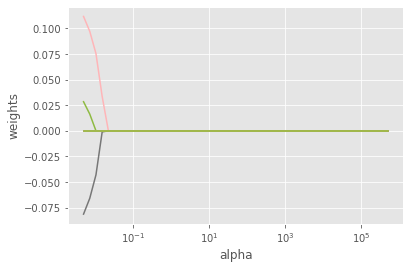

In [79]:
#Plot Lasso tuning parameter alpha, the relationship between alpha and the weight (regression parameters)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [80]:
#Cross Validation Lasso (10-fold cross-validation)
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)
lasso.fit(X_train, y_train)
mse = mean_squared_error(y_test, lasso.predict(X_test))
print("mse = ", mse)
print("rmse = ", np.sqrt(mse))
print("best model coefficients:")
pd.Series(lasso.coef_, index=X.columns)

Alpha= 0.0006566779176820057
mse =  0.049051939678687234
rmse =  0.22147672491412554
best model coefficients:


Feature1    -0.056607
Feature2     0.000000
Feature3    -0.013479
Feature4     0.000000
Feature5     0.000000
Feature6     0.071985
Feature7     0.108834
Feature8     0.010618
Feature9    -0.000000
Feature10   -0.024205
Feature11   -0.151454
Feature12    0.020411
Feature13   -0.008024
dtype: float64

In [81]:
#Use the model to predict the output for testing dataset
test_predictions = lasso.predict(test)
test_predictions

array([-0.2362403 ,  0.17930402, -0.09999174, -0.11221827, -0.05877882,
        0.11350225,  0.0922628 ,  0.06160995, -0.01055881, -0.02966442,
       -0.02341146, -0.00521872, -0.07692268,  0.0039371 ,  0.05186225])